In [1]:
import os
import sys
import tqdm
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import seed
from skopt import BayesSearchCV
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error

sys.path.append('.')
sys.path.append('../../')
sys.path.append('../network_model/')
sys.path.append('../validation/')

notebook_path = os.getcwd()
project_path = os.path.abspath(os.path.join(notebook_path, '..'))
sys.path.append(project_path)

from network_model.network_classes import Network
from networks_container import NetworksContainer
from estimator import Estimator

In [2]:
cherrypicked_seed = 42

seed(cherrypicked_seed)
random.seed(cherrypicked_seed)

In [3]:
epochs = 1000

In [4]:

df_without_countermeasures = pd.read_csv("./simulation results/simulation_with_bots_obama_endorsers_percentages.csv", header=None)
df_without_countermeasures = df_without_countermeasures.transpose()
df_blocked = pd.read_csv("./simulation results/simulation_complaint_1.00_obama_endorsers_percentages.csv", header=None)
df_blocked = df_blocked.transpose()
df_without_bots = pd.read_csv("./simulation results/simulation_without_bots_obama_endorsers_percentages.csv", header=None)
df_without_bots = df_without_bots.transpose()
df_influencer_vaccinated = pd.read_csv("./simulation results/simulation_influencer_vaccinated_obama_endorsers_percentages.csv", header=None)
df_influencer_vaccinated = df_influencer_vaccinated.transpose()
df_fact_010 = pd.read_csv("./simulation results/simulation_efc_010_obama_endorsers_percentages.csv", header=None)
df_fact_010 = df_fact_010.transpose()

In [5]:
total_y_pred_list = df_without_countermeasures.values.tolist()
total_y_pred_list_prob_100 = df_blocked.values.tolist()
total_y_pred_list_no_bots = df_without_bots.values.tolist()
total_y_pred_list_influencer_vacc = df_influencer_vaccinated.values.tolist()
total_y_pred_list_fact_010 = df_fact_010.values.tolist()

In [6]:
avg_y_pred_list = [sum(column) / len(column) for column in zip(*total_y_pred_list)]
avg_y_pred_list_prob_100 = [sum(column) / len(column) for column in zip(*total_y_pred_list_prob_100)]
avg_y_pred_list_no_bots = [sum(column) / len(column) for column in zip(*total_y_pred_list_no_bots)]
avg_y_pred_list_influencer_vacc = [sum(column) / len(column) for column in zip(*total_y_pred_list_influencer_vacc)]
avg_y_pred_list_fact_010 = [sum(column) / len(column) for column in zip(*total_y_pred_list_fact_010)]

In [7]:
std_y_pred_list = [np.std(column) for column in zip(*total_y_pred_list)]
std_y_pred_list_prob_100 = [np.std(column) for column in zip(*total_y_pred_list_prob_100)]
std_y_pred_list_no_bots = [np.std(column) for column in zip(*total_y_pred_list_no_bots)]
std_y_pred_list_influencer_vacc = [np.std(column) for column in zip(*total_y_pred_list_influencer_vacc)]
std_y_pred_list_fact_010 = [np.std(column) for column in zip(*total_y_pred_list_fact_010)]

In [8]:
std_low_y_pred_list = []
std_high_y_pred_list = []

for i in range(len(avg_y_pred_list)):
    std_low_y_pred_list.append(avg_y_pred_list[i] - std_y_pred_list[i])
    std_high_y_pred_list.append(avg_y_pred_list[i] + std_y_pred_list[i])

In [9]:
std_low_y_pred_list_prob_100 = []
std_high_y_pred_list_prob_100 = []

for i in range(len(avg_y_pred_list_prob_100)):
    std_low_y_pred_list_prob_100.append(avg_y_pred_list_prob_100[i] - std_y_pred_list_prob_100[i])
    std_high_y_pred_list_prob_100.append(avg_y_pred_list_prob_100[i] + std_y_pred_list_prob_100[i])

In [10]:
std_low_y_pred_list_no_bots = []
std_high_y_pred_list_no_bots = []

for i in range(len(avg_y_pred_list_no_bots)):
    std_low_y_pred_list_no_bots.append(avg_y_pred_list_no_bots[i] - std_y_pred_list_no_bots[i])
    std_high_y_pred_list_no_bots.append(avg_y_pred_list_no_bots[i] + std_y_pred_list_no_bots[i])

In [11]:
std_low_y_pred_list_influencer_vacc = []
std_high_y_pred_list_influencer_vacc = []

for i in range(len(avg_y_pred_list_influencer_vacc)):
    std_low_y_pred_list_influencer_vacc.append(avg_y_pred_list_influencer_vacc[i] - std_y_pred_list_influencer_vacc[i])
    std_high_y_pred_list_influencer_vacc.append(avg_y_pred_list_influencer_vacc[i] + std_y_pred_list_influencer_vacc[i])

In [12]:
std_low_y_pred_list_fact_010 = []
std_high_y_pred_list_fact_010 = []

for i in range(len(avg_y_pred_list_fact_010)):
    std_low_y_pred_list_fact_010.append(avg_y_pred_list_fact_010[i] - std_y_pred_list_fact_010[i])
    std_high_y_pred_list_fact_010.append(avg_y_pred_list_fact_010[i] + std_y_pred_list_fact_010[i])

In [13]:
x = []
for i in range(epochs + 1):
    x.append(i)

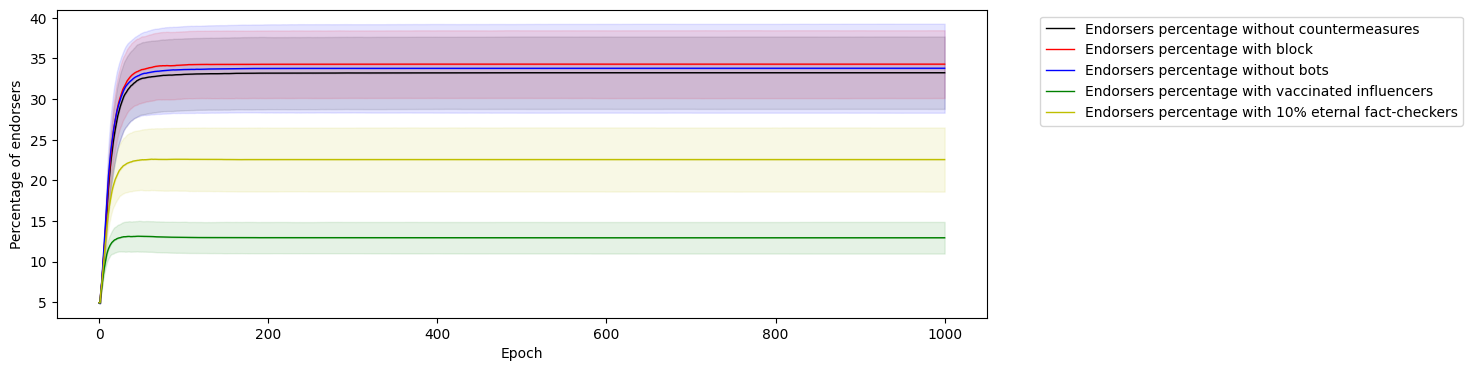

In [14]:
fig, axs = plt.subplots(1, 1, figsize=(12, 4))
axs.plot(avg_y_pred_list, c='k', label='Endorsers percentage without countermeasures', linewidth=1.0)
axs.fill_between(x, avg_y_pred_list, std_low_y_pred_list, color='k', alpha=.1)
axs.fill_between(x, avg_y_pred_list, std_high_y_pred_list, color='k', alpha=.1)
axs.plot(avg_y_pred_list_prob_100, c='r', label='Endorsers percentage with block', linewidth=1.0)
axs.fill_between(x, avg_y_pred_list_prob_100, std_low_y_pred_list_prob_100, color='r', alpha=.1)
axs.fill_between(x, avg_y_pred_list_prob_100, std_high_y_pred_list_prob_100, color='r', alpha=.1)
plt.plot(avg_y_pred_list_no_bots, c='b', label='Endorsers percentage without bots', linewidth=1.0)
axs.fill_between(x, avg_y_pred_list_no_bots, std_low_y_pred_list_no_bots, color='b', alpha=.1)
axs.fill_between(x, avg_y_pred_list_no_bots, std_high_y_pred_list_no_bots, color='b', alpha=.1)
plt.plot(avg_y_pred_list_influencer_vacc, c='g', label='Endorsers percentage with vaccinated influencers', linewidth=1.0)
axs.fill_between(x, avg_y_pred_list_influencer_vacc, std_low_y_pred_list_influencer_vacc, color='g', alpha=.1)
axs.fill_between(x, avg_y_pred_list_influencer_vacc, std_high_y_pred_list_influencer_vacc, color='g', alpha=.1)
plt.plot(avg_y_pred_list_fact_010, c='y', label='Endorsers percentage with 10% eternal fact-checkers', linewidth=1.0)
axs.fill_between(x, avg_y_pred_list_fact_010, std_low_y_pred_list_fact_010, color='y', alpha=.1)
axs.fill_between(x, avg_y_pred_list_fact_010, std_high_y_pred_list_fact_010, color='y', alpha=.1)
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Epoch")
plt.ylabel("Percentage of endorsers")
plt.show()